In [ ]:
import csv
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

## Provide Trainingsdata

In [ ]:
# Lists to store data
timestamps = []
positions = []

# Read data from CSV file starting from the 2nd row
with open('velocity_data.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # Skip header
    for row in csvreader:
        timestamps.append(float(row[0]))
        positions.append(float(row[5]))


#print('timestamps: ', timestamps)
#print('positions: ', positions)

In [ ]:
# Scale the timestamps
def scale_timestamps(timestamps):
    min_timestamp = min(timestamps)
    max_timestamp = max(timestamps)
    scaled_timestamps = [(t - min_timestamp) / (max_timestamp - min_timestamp) for t in timestamps]
    return scaled_timestamps

# Scale timestamps
scaled_timestamps = scale_timestamps(timestamps)

#print("Original timestamps:", timestamps)
#print("Scaled timestamps:", scaled_timestamps)

In [ ]:
# Plot the Trainigsdata
plt.figure(figsize=(10, 6))
plt.plot(scaled_timestamps, positions, marker='o')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Time-Position Relationship')
plt.grid(True)
plt.show()

# Provide Test data

In [ ]:
# Lists to store data
test_timestamps = []

# Read data from CSV file starting from the 2nd row
with open('test_data.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # Skip header
    for row in csvreader:
        test_timestamps.append(float(row[0]))

print('timestamps: ', test_timestamps)

# Scale the timestamps
def scale_timestamps(timestamps):
    min_timestamp = min(timestamps)
    max_timestamp = max(timestamps)
    scaled_timestamps = [(t - min_timestamp) / (max_timestamp - min_timestamp) for t in timestamps]
    return scaled_timestamps

# Scale timestamps
scaled_test_timestamps = scale_timestamps(test_timestamps)

#print("Original timestamps:", test_timestamps)
#print("Scaled timestamps:", scaled_test_timestamps)

# Implement Neural Network

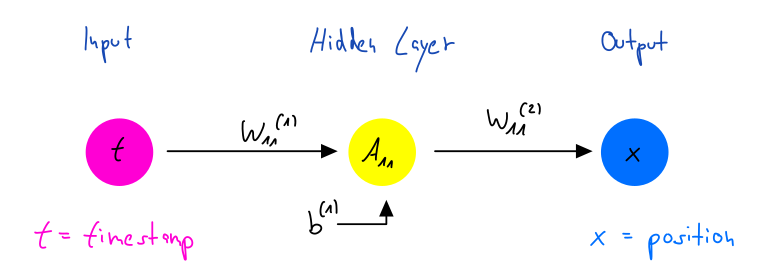

In [ ]:
def NeuralNetwork(timestamps, positions):
    model = Sequential()

    model.add(Dense(units=1, input_shape=(1,), use_bias=True)) # Hidden Layer

    model.add(Dense(1)) # Output Layer

    model.summary()
    model.compile('rmsprop', loss='mse', metrics=['mse'])

    h = model.fit(timestamps, positions, epochs=500, verbose=True)

    return model

In [ ]:
# Calling function #this is tensorflow
model = NeuralNetwork(scaled_timestamps, positions)

In [ ]:
# Make predictions using the trained model
predicted_positions = model.predict(scaled_test_timestamps)
#print('actual positions:', positions)
#print('predicted_positions: ', predicted_positions)

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(scaled_timestamps, positions, label='Actual Positions', color='blue')
plt.plot(scaled_test_timestamps, predicted_positions, label='Predicted Positions', color='red')
plt.xlabel('Timestamps')
plt.ylabel('Positions')
plt.title('Actual vs. Predicted Positions')
plt.legend()
plt.grid()
plt.show()